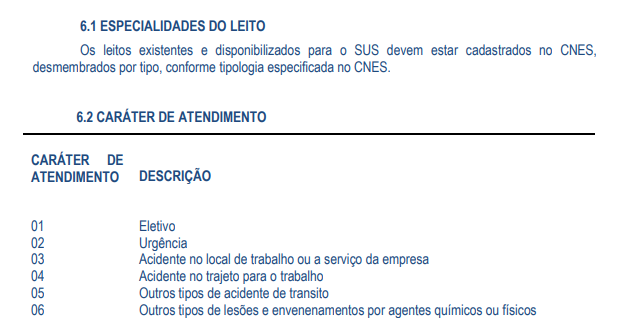

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns

In [47]:
frameon=False

In [48]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(10,8)})

In [49]:
data = pd.read_csv('sih_rd_L20.csv', sep=',')
data

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,CEP,MUNIC_RES,NASC,SEXO,UTI_MES_IN,UTI_MES_AN,UTI_MES_AL,UTI_MES_TO,MARCA_UTI,UTI_INT_IN,UTI_INT_AN,UTI_INT_AL,UTI_INT_TO,DIAR_ACOM,QT_DIARIAS,PROC_SOLIC,PROC_REA,VAL_SH,VAL_SP,VAL_SADT,VAL_RN,VAL_ACOMP,VAL_ORTP,VAL_SANGUE,VAL_SADTSR,VAL_TRANSP,VAL_OBSANG,VAL_PED1AC,VAL_TOT,VAL_UTI,US_TOT,DT_INTER,DT_SAIDA,...,GESTOR_DT,CNES,CNPJ_MANT,INFEHOSP,CID_ASSO,CID_MORTE,COMPLEX,FINANC,FAEC_TP,REGCT,RACA_COR,ETNIA,SEQUENCIA,REMESSA,AUD_JUST,SIS_JUST,VAL_SH_FED,VAL_SP_FED,VAL_SH_GES,VAL_SP_GES,VAL_UCI,MARCA_UCI,DIAGSEC1,DIAGSEC2,DIAGSEC3,DIAGSEC4,DIAGSEC5,DIAGSEC6,DIAGSEC7,DIAGSEC8,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
0,350000,2017,5,7,NaN,3517108318207,1,2992060,355030,20041112,1,0,0,0,0,0,0,0,0,0,1,1,301060010,301060010,43.65,11.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.27,0.0,16.74,20170511,20170512,...,NaN,2078015,6.044804e+13,NaN,0,0,2,6,NaN,7102,1,0,25212,HE35000001N201705.DTS,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0
1,350000,2017,5,7,5.636381e+13,3517113622869,1,15570000,351070,20111105,1,0,0,0,0,0,0,0,0,0,2,2,303080051,303080051,207.85,33.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,240.91,0.0,73.00,20170516,20170518,...,NaN,2082071,NaN,NaN,0,0,2,6,NaN,7102,3,0,93076,HE35000001N201705.DTS,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0
2,350000,2017,5,3,NaN,3517108920391,1,4932310,355030,20121101,1,0,0,0,0,0,0,0,0,0,5,5,303080051,303080051,231.85,33.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,264.91,0.0,80.27,20170331,20170405,...,NaN,2078015,6.044804e+13,NaN,0,0,2,6,NaN,7102,1,0,24099,HE35000001N201705.DTS,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0
3,350000,2017,5,1,4.637450e+13,3517114663799,1,5139080,355030,19490404,3,0,0,0,0,0,0,0,0,0,0,1,301060070,301060070,30.47,9.91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.38,0.0,12.23,20170529,20170529,...,NaN,2091755,4.637450e+13,NaN,0,0,2,6,NaN,7102,99,0,45264,HE35000001N201705.DTS,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0
4,350000,2017,5,7,4.637450e+13,3517114546528,1,4814055,355030,20151015,1,0,0,0,0,0,0,0,0,0,3,3,303080051,303080051,291.39,44.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,336.02,0.0,101.82,20170516,20170519,...,NaN,2077671,4.637450e+13,NaN,0,0,2,6,NaN,7102,1,0,20232,HE35000001N201705.DTS,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,L010,R609,R509,R11,NaN,NaN,NaN,NaN,NaN,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4751,280000,2019,9,7,1.043698e+13,2819100594013,1,48475000,291650,20130305,3,0,0,0,0,0,0,0,0,0,0,3,303080051,303080051,287.77,49.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,337.36,0.0,84.34,20190604,20190607,...,NaN,2816210,NaN,NaN,0,0,2,6,NaN,7106,99,0,9993,HE28000001N201909.DTS,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0
4752,280030,2019,9,7,1.512644e+13,2819101185967,1,49100000,280670,20061207,3,0,0,0,0,0,0,0,0,0,10,10,303080051,303080051,336.61,48.54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,385.15,0.0,96.28,20190809,20190819,...,NaN,2534,NaN,NaN,0,0,2,6,NaN,7109,4,0,6893,HM28003001N201909.DTS,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0
4753,355220,2019,5,7,6.099075e+13,3519113760481,1,18079664,355220,20110707,1,0,0,0,0,0,0,0,0,0,8,8,303080051,303080051,288.23,40.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,329.03,0.0,85.90,20190514,20190522,...,NaN,2765942,6.099075e+13,NaN,0,0,2,6,NaN,0,1,0,2083,HM35522001N201905.DTS,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,B018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,0,0,0,0,0,0,0
4754,110004,2020,4,7,NaN,1120100754058,1,76960970,110004,20190416,3,

In [50]:
data.columns

Index(['UF_ZI', 'ANO_CMPT', 'MES_CMPT', 'ESPEC', 'CGC_HOSP', 'N_AIH', 'IDENT',
       'CEP', 'MUNIC_RES', 'NASC',
       ...
       'DIAGSEC9', 'TPDISEC1', 'TPDISEC2', 'TPDISEC3', 'TPDISEC4', 'TPDISEC5',
       'TPDISEC6', 'TPDISEC7', 'TPDISEC8', 'TPDISEC9'],
      dtype='object', length=113)

In [51]:
#assegurando que temos apenas CID10 = L20 
data['DIAG_PRINC'].unique()

array(['L209', 'L208', 'L200', 'L20'], dtype=object)

In [52]:
#verificando o CID10 notificado
data['CID_NOTIF'].unique()

array([nan])

In [53]:
data['MARCA_UTI'].unique()

array([ 0, 79, 78, 75, 82, 81, 76])

In [54]:
data['SEXO'].unique()
'''
1- MASCULINO
3- FEMININO 
fonte: https://bvsms.saude.gov.br/bvs/publicacoes/07_0066_M.pdf

'''

'\n1- MASCULINO\n3- FEMININO \nfonte: https://bvsms.saude.gov.br/bvs/publicacoes/07_0066_M.pdf\n\n'

In [55]:
data['CID_NOTIF'].unique()

array([nan])

In [56]:
#custo pela faixa etária
idadeList = []
for i in range(len(data)):
  val = data['IDADE'].iloc[i] 
  if val < 6:
    idadeList.append("0-5")
  elif val < 12:
    idadeList.append("6-11")
  elif val < 18:
    idadeList.append("12-17")
  elif val < 30:
    idadeList.append("18-29")
  elif val < 50:
    idadeList.append("30-49")
  else:
    idadeList.append(">=50")

idadeList

['12-17',
 '0-5',
 '0-5',
 '>=50',
 '0-5',
 '6-11',
 '0-5',
 '6-11',
 '12-17',
 '18-29',
 '6-11',
 '30-49',
 '12-17',
 '0-5',
 '6-11',
 '30-49',
 '6-11',
 '0-5',
 '0-5',
 '0-5',
 '30-49',
 '12-17',
 '6-11',
 '6-11',
 '>=50',
 '12-17',
 '0-5',
 '12-17',
 '12-17',
 '0-5',
 '6-11',
 '0-5',
 '18-29',
 '6-11',
 '0-5',
 '6-11',
 '12-17',
 '18-29',
 '12-17',
 '0-5',
 '18-29',
 '>=50',
 '0-5',
 '0-5',
 '12-17',
 '6-11',
 '0-5',
 '12-17',
 '6-11',
 '18-29',
 '0-5',
 '0-5',
 '12-17',
 '0-5',
 '12-17',
 '6-11',
 '6-11',
 '6-11',
 '6-11',
 '0-5',
 '>=50',
 '0-5',
 '0-5',
 '0-5',
 '6-11',
 '0-5',
 '30-49',
 '6-11',
 '6-11',
 '6-11',
 '18-29',
 '30-49',
 '12-17',
 '6-11',
 '18-29',
 '18-29',
 '0-5',
 '6-11',
 '0-5',
 '0-5',
 '6-11',
 '6-11',
 '0-5',
 '6-11',
 '12-17',
 '0-5',
 '0-5',
 '0-5',
 '0-5',
 '0-5',
 '6-11',
 '0-5',
 '0-5',
 '6-11',
 '30-49',
 '0-5',
 '0-5',
 '0-5',
 '0-5',
 '12-17',
 '6-11',
 '6-11',
 '6-11',
 '0-5',
 '0-5',
 '0-5',
 '0-5',
 '0-5',
 '6-11',
 '0-5',
 '>=50',
 '0-5',
 '6-11',

In [57]:
data.insert(113, 'FAIXA_ETÁRIA', idadeList)
data.head(3)

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,CEP,MUNIC_RES,NASC,SEXO,UTI_MES_IN,UTI_MES_AN,UTI_MES_AL,UTI_MES_TO,MARCA_UTI,UTI_INT_IN,UTI_INT_AN,UTI_INT_AL,UTI_INT_TO,DIAR_ACOM,QT_DIARIAS,PROC_SOLIC,PROC_REA,VAL_SH,VAL_SP,VAL_SADT,VAL_RN,VAL_ACOMP,VAL_ORTP,VAL_SANGUE,VAL_SADTSR,VAL_TRANSP,VAL_OBSANG,VAL_PED1AC,VAL_TOT,VAL_UTI,US_TOT,DT_INTER,DT_SAIDA,...,CNES,CNPJ_MANT,INFEHOSP,CID_ASSO,CID_MORTE,COMPLEX,FINANC,FAEC_TP,REGCT,RACA_COR,ETNIA,SEQUENCIA,REMESSA,AUD_JUST,SIS_JUST,VAL_SH_FED,VAL_SP_FED,VAL_SH_GES,VAL_SP_GES,VAL_UCI,MARCA_UCI,DIAGSEC1,DIAGSEC2,DIAGSEC3,DIAGSEC4,DIAGSEC5,DIAGSEC6,DIAGSEC7,DIAGSEC8,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9,FAIXA_ETÁRIA
0,350000,2017,5,7,NaN,3517108318207,1,2992060,355030,20041112,1,0,0,0,0,0,0,0,0,0,1,1,301060010,301060010,43.65,11.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.27,0.0,16.74,20170511,20170512,...,2078015,6.044804e+13,NaN,0,0,2,6,NaN,7102,1,0,25212,HE35000001N201705.DTS,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,12-17
1,350000,2017,5,7,5.636381e+13,3517113622869,1,15570000,351070,20111105,1,0,0,0,0,0,0,0,0,0,2,2,303080051,303080051,207.85,33.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,240.91,0.0,73.00,20170516,20170518,...,2082071,NaN,NaN,0,0,2,6,NaN,7102,3,0,93076,HE35000001N201705.DTS,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0-5
2,350000,2017,5,3,NaN,3517108920391,1,4932310,355030,20121101,1,0,0,0,0,0,0,0,0,0,5,5,303080051,303080051,231.85,33.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,264.91,0.0,80.27,20170331,20170405,...,2078015,6.044804e+13,NaN,0,0,2,6,NaN,7102,1,0,24099,HE35000001N201705.DTS,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0-5


In [58]:
#agrupando a faixa etária pela somatória dos valores totais aprovados ao longo dos ano de 2016-2020
data_1 = data.groupby(['FAIXA_ETÁRIA'])['VAL_TOT'].agg('sum').reset_index()
data_1 = pd.DataFrame(data_1)
data_1 = data_1.reindex([0, 4, 1, 2, 3, 5])
data_1

,FAIXA_ETÁRIA,VAL_TOT
0,0-5,556887.09
4,6-11,389591.28
1,12-17,161612.78
2,18-29,98520.97
3,30-49,93026.14
5,>=50,239230.21


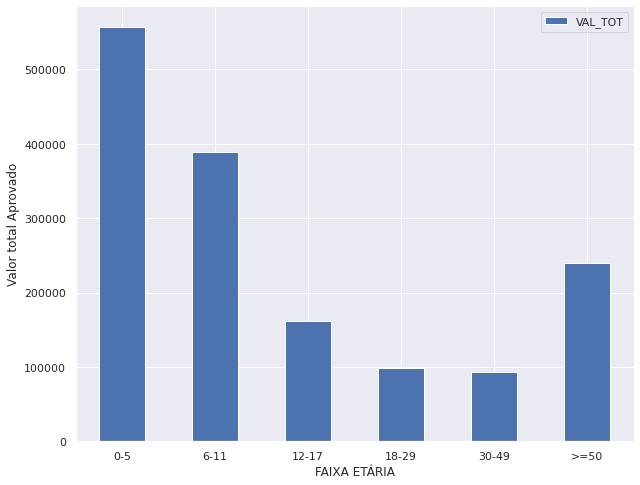

In [59]:
data_1.set_index('FAIXA_ETÁRIA').plot(kind='bar', figsize=(10, 8), rot=0)
plt.xlabel('FAIXA ETÁRIA', fontsize=12)
plt.ylabel('Valor total Aprovado', fontsize=12);

In [60]:
data_2 = data.groupby(['FAIXA_ETÁRIA', 'ANO_CMPT'])['VAL_TOT'].sum().reset_index()
data_2 = pd.DataFrame(data_2)
data_2

,FAIXA_ETÁRIA,ANO_CMPT,VAL_TOT
0,0-5,2016,112171.09
1,0-5,2017,111977.79
2,0-5,2018,129853.42
3,0-5,2019,114315.76
4,0-5,2020,88569.03
5,12-17,2016,31688.30
6,12-17,2017,31870.13
7,12-17,2018,30821.46
8,12-17,2019,32020.34
9,12-17,2020,35212.55


In [61]:
sorter = ['0-5', '6-11', '12-17', '18-29', '30-49', '>=50']
data_2.FAIXA_ETÁRIA = data_2.FAIXA_ETÁRIA.astype("category")
data_2.FAIXA_ETÁRIA.cat.set_categories(sorter, inplace=True)

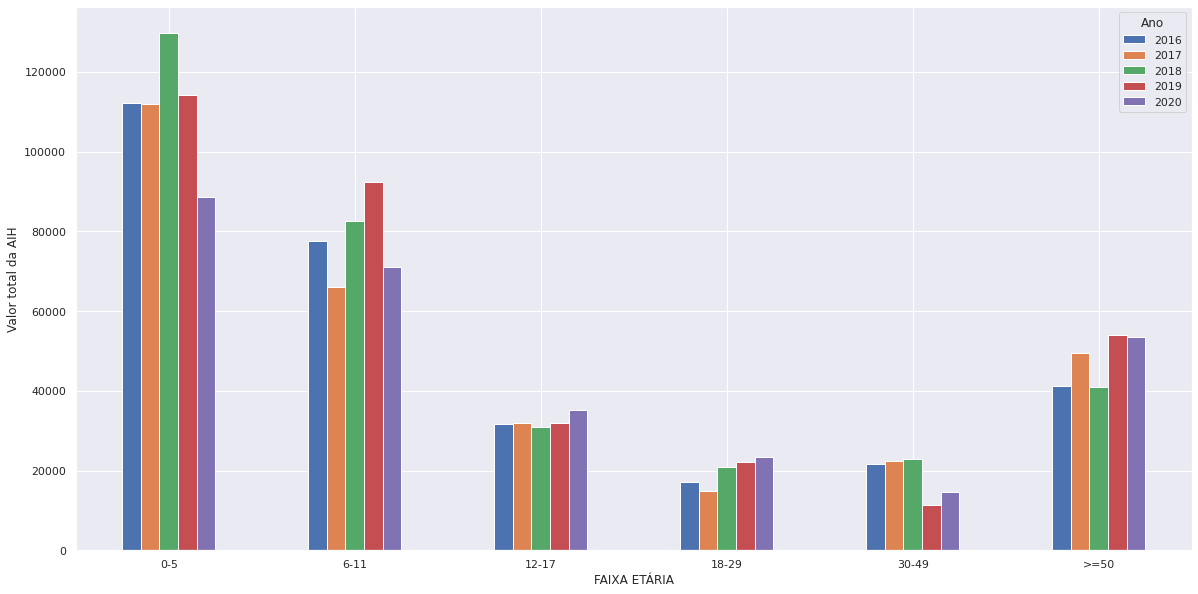

In [62]:
data_2.pivot("FAIXA_ETÁRIA", "ANO_CMPT", "VAL_TOT").plot(kind='bar', figsize = (20,10), rot= 0)
plt.legend(title='Ano')
plt.xlabel('FAIXA ETÁRIA', fontsize=12)
plt.ylabel('Valor total da AIH', fontsize=12)
plt.show()

In [63]:
data_2_a = data_2.groupby(['FAIXA_ETÁRIA'])['VAL_TOT'].mean().reset_index(name='MEDIA_GASTOS_TOTAIS')
data_2_a = pd.DataFrame(data_2_a)
data_2_a

,FAIXA_ETÁRIA,MEDIA_GASTOS_TOTAIS
0,0-5,111377.418
1,6-11,77918.256
2,12-17,32322.556
3,18-29,19704.194
4,30-49,18605.228
5,>=50,47846.042


In [64]:
data_2_a['MEDIA_GASTOS_TOTAIS'] = [ round(elem, 2) for elem in data_2_a['MEDIA_GASTOS_TOTAIS']]
data_2_a

,FAIXA_ETÁRIA,MEDIA_GASTOS_TOTAIS
0,0-5,111377.42
1,6-11,77918.26
2,12-17,32322.56
3,18-29,19704.19
4,30-49,18605.23
5,>=50,47846.04


In [65]:
data_2_a.rename({'FAIXA_ETÁRIA': 'FAIXAS ETÁRIAS', 'MEDIA_GASTOS_TOTAIS': 'Total Anual Estimado - AIH'}, axis=1, inplace=True)
data_2_a

,FAIXAS ETÁRIAS,Total Anual Estimado - AIH
0,0-5,111377.42
1,6-11,77918.26
2,12-17,32322.56
3,18-29,19704.19
4,30-49,18605.23
5,>=50,47846.04


In [66]:
data_2_a.to_csv("sih.csv", index=True)

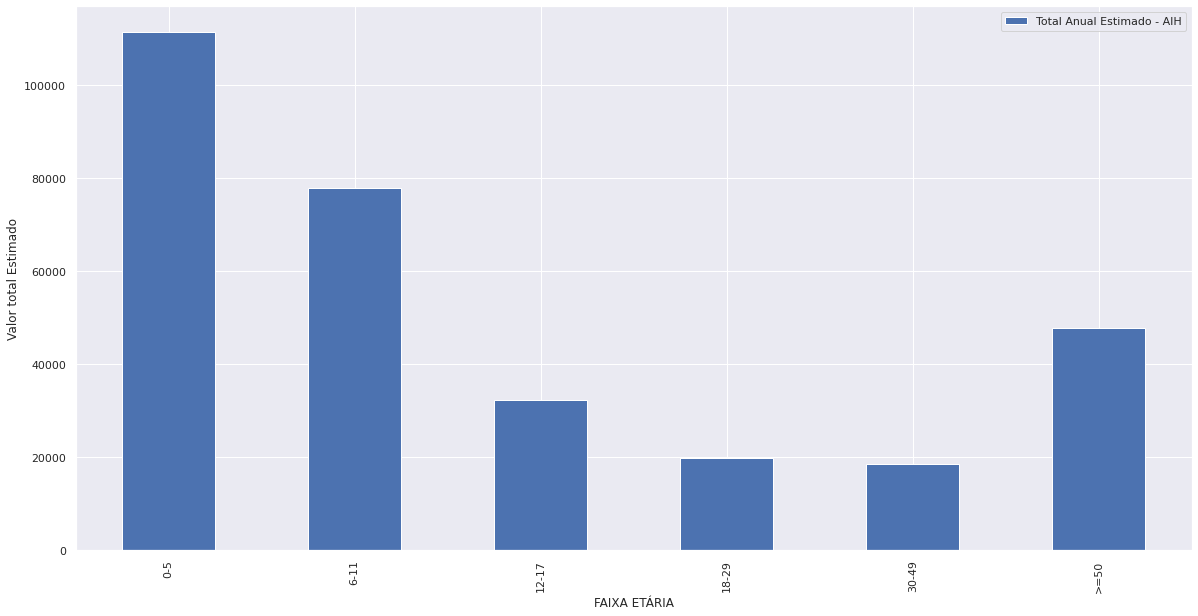

In [67]:
data_2_a.plot(x = "FAIXAS ETÁRIAS", kind="bar",figsize=(20,10))
plt.xlabel('FAIXA ETÁRIA', fontsize=12)
plt.ylabel('Valor total Estimado', fontsize=12)
plt.show()

fonte: https://auditasus.com.br/internacoes-sus/ocupacao/taxa-de-ocupacao-em-uti/taxa-de-ocupacao-em-leitos-uti-uf

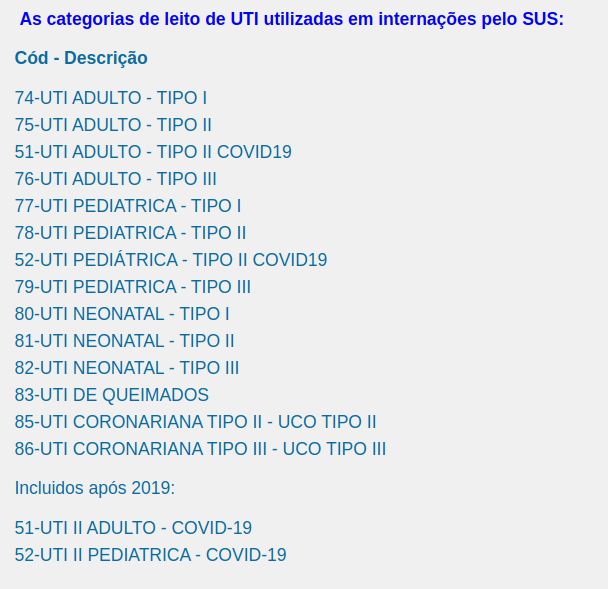

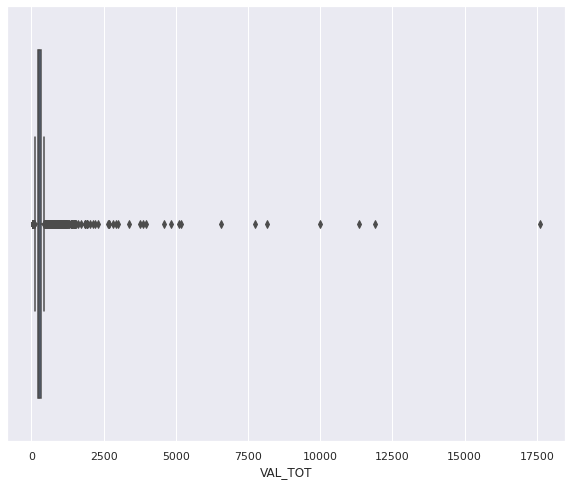

In [68]:
#boxplot do valor total
ax = sns.boxplot(x=data["VAL_TOT"])

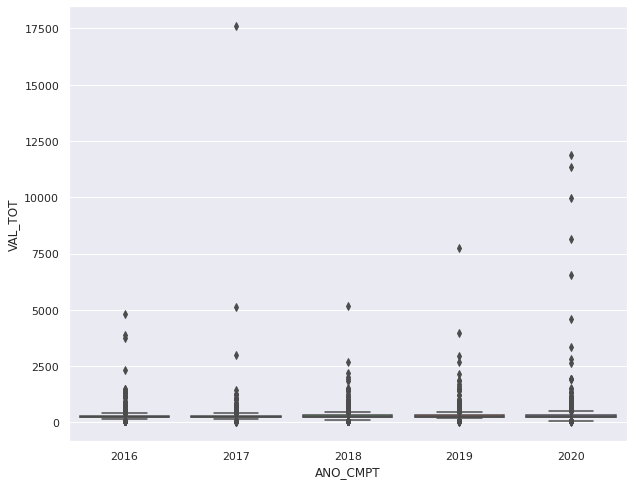

In [69]:
#plotando boxplot
ax = sns.boxplot(x="ANO_CMPT", y="VAL_TOT", data=data)

Em 2017 teve um custo total bem acima da média. Investigando esse valor:


In [70]:
data['VAL_TOT'].max()

17602.3

In [71]:
#investigando a minha com VAL_TOT >17500
data.loc[data['VAL_TOT'] == 17602.3]

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,CEP,MUNIC_RES,NASC,SEXO,UTI_MES_IN,UTI_MES_AN,UTI_MES_AL,UTI_MES_TO,MARCA_UTI,UTI_INT_IN,UTI_INT_AN,UTI_INT_AL,UTI_INT_TO,DIAR_ACOM,QT_DIARIAS,PROC_SOLIC,PROC_REA,VAL_SH,VAL_SP,VAL_SADT,VAL_RN,VAL_ACOMP,VAL_ORTP,VAL_SANGUE,VAL_SADTSR,VAL_TRANSP,VAL_OBSANG,VAL_PED1AC,VAL_TOT,VAL_UTI,US_TOT,DT_INTER,DT_SAIDA,...,CNES,CNPJ_MANT,INFEHOSP,CID_ASSO,CID_MORTE,COMPLEX,FINANC,FAEC_TP,REGCT,RACA_COR,ETNIA,SEQUENCIA,REMESSA,AUD_JUST,SIS_JUST,VAL_SH_FED,VAL_SP_FED,VAL_SH_GES,VAL_SP_GES,VAL_UCI,MARCA_UCI,DIAGSEC1,DIAGSEC2,DIAGSEC3,DIAGSEC4,DIAGSEC5,DIAGSEC6,DIAGSEC7,DIAGSEC8,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9,FAIXA_ETÁRIA
1842,292740,2017,3,1,1.515375e+13,2917102577378,1,41210000,292740,19530311,3,0,0,0,5,75,0,0,0,0,0,2,303060190,415020034,15322.18,2280.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17602.3,2393.6,5517.96,20170218,20170224,...,3832,NaN,NaN,0,0,3,6,NaN,0,3,0,1595,HM29274001N201703.DTS,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,>=50


In [72]:
#contabilizando o número de pacientes
qntReg = data.groupby(['ANO_CMPT']).size().reset_index(name="REGISTROS_TOTAIS")
qntReg

,ANO_CMPT,REGISTROS_TOTAIS
0,2016,989
1,2017,950
2,2018,1068
3,2019,1029
4,2020,720


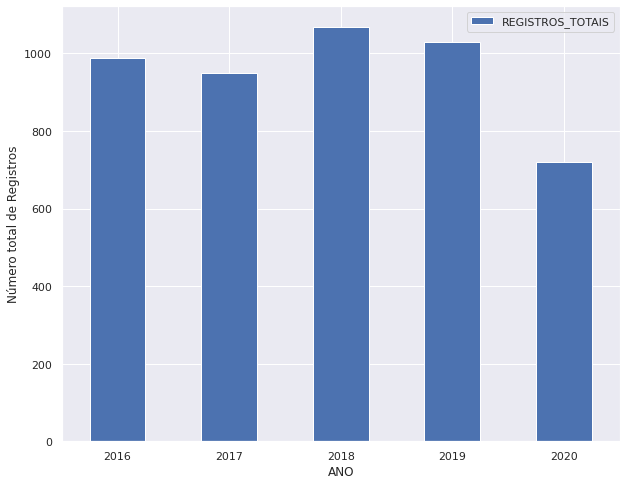

In [73]:
qntReg.set_index('ANO_CMPT').plot(kind='bar', figsize=(10, 8), rot=0)
plt.xlabel('ANO', fontsize=12)
plt.ylabel('Número total de Registros', fontsize=12);

In [74]:
#agrupanfdo por ano e pelo total gasto AIH

data_group_0 = data.groupby(['ANO_CMPT'])['VAL_TOT'].agg('sum')
data_group_0 = pd.DataFrame(data_group_0)
data_group_0

,VAL_TOT
ANO_CMPT,
2016,301298.52
2017,296785.36
2018,328294.74
2019,326203.54
2020,286286.31


In [75]:
#analisando a média
media = data_group_0["VAL_TOT"].mean()
print(round(media,2))

307773.69


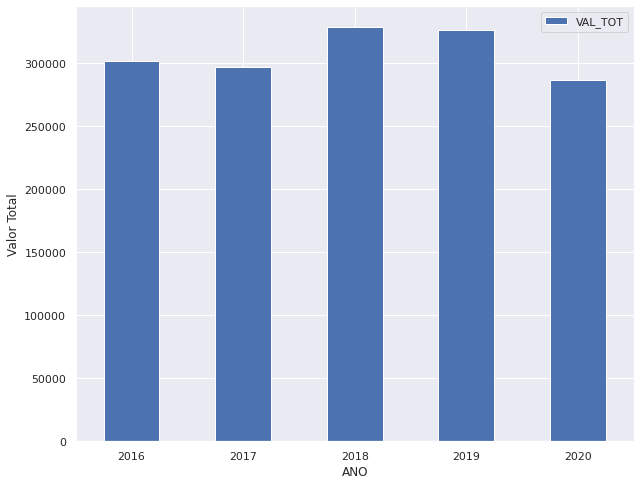

In [76]:
#rot - rotação da legenda, no caso 0 graus
ax = data_group_0.plot.bar(figsize=(10, 8), rot=0);
plt.xlabel('ANO', fontsize=12)
plt.ylabel('Valor Total', fontsize=12);

#Os valores de AIH gastos por ano são praticamente os mesmos, variando muito pouco de um para outro

In [77]:
#valor médio do gasto total com AIH


In [78]:
#agrupanfdo por ano e mês pelo total gasto AIH

data_group_1 = data.groupby(['ANO_CMPT', 'MES_CMPT'])['VAL_TOT'].agg('sum')
data_group_1 = pd.DataFrame(data_group_1)
data_group_1

VAL_TOT
ANO_CMPT MES_CMPT          
2016     1         26431.70
         2         23812.29
         3         29934.35
         4         22545.73
         5         20496.81
         6         21704.19
         7         23518.65
         8         23150.25
         9         28744.04
         10        30389.28
         11        28406.01
         12        22165.22
2017     1         19112.88
         2         16384.97
         3         37704.02
         4         19864.32
         5         26637.43
         6         20042.46
         7         17408.02
         8         34198.50
         9         28940.07
         10        22491.62
         11        26834.54
         12        27166.53
2018     1         30662.65
         2         26987.78
         3         29387.02
         4         22427.39
         5         27195.09
         6         25498.68
         7         26487.10
         8         26178.01
         9         31113.83
         10        31477.70
         11        27722.02
         12        23157.47
2019     1         40560.59
         2         28589.03
         3         25366.67
         4         25574.79
         5         21209.05
         6         27288.31
         7         16944.45
         8         25199.37
         9         28913.65
         10        27564.80
         11        33304.28
         12        25688.55
2020     1         40351.23
         2         46273.04
         3         26647.04
         4         14738.58
         5         14914.00
         6         12276.92
         7         17130.31
         8         16799.46
         9         28676.87
         10        25473.08
         11        19079.31
         12        23926.47

In [79]:
data_group_1_a = data.groupby(['ANO_CMPT', 'MES_CMPT'])['VAL_TOT'].agg('sum').reset_index()
data_group_1_a.columns

Index(['ANO_CMPT', 'MES_CMPT', 'VAL_TOT'], dtype='object')

In [80]:
data_group_1_a["Full_Date"] = data_group_1_a["ANO_CMPT"].astype(str) + "_" + data_group_1_a["MES_CMPT"].astype(str)
data_group_1_a

,ANO_CMPT,MES_CMPT,VAL_TOT,Full_Date
0,2016,1,26431.70,2016_1
1,2016,2,23812.29,2016_2
2,2016,3,29934.35,2016_3
3,2016,4,22545.73,2016_4
4,2016,5,20496.81,2016_5
5,2016,6,21704.19,2016_6
6,2016,7,23518.65,2016_7
7,2016,8,23150.25,2016_8
8,2016,9,28744.04,2016_9
9,2016,10,30389.28,2016_10


In [81]:
data_a = [go.Scatter(x=data_group_1_a.Full_Date, y=data_group_1_a['VAL_TOT'])]

py.iplot(data_a)

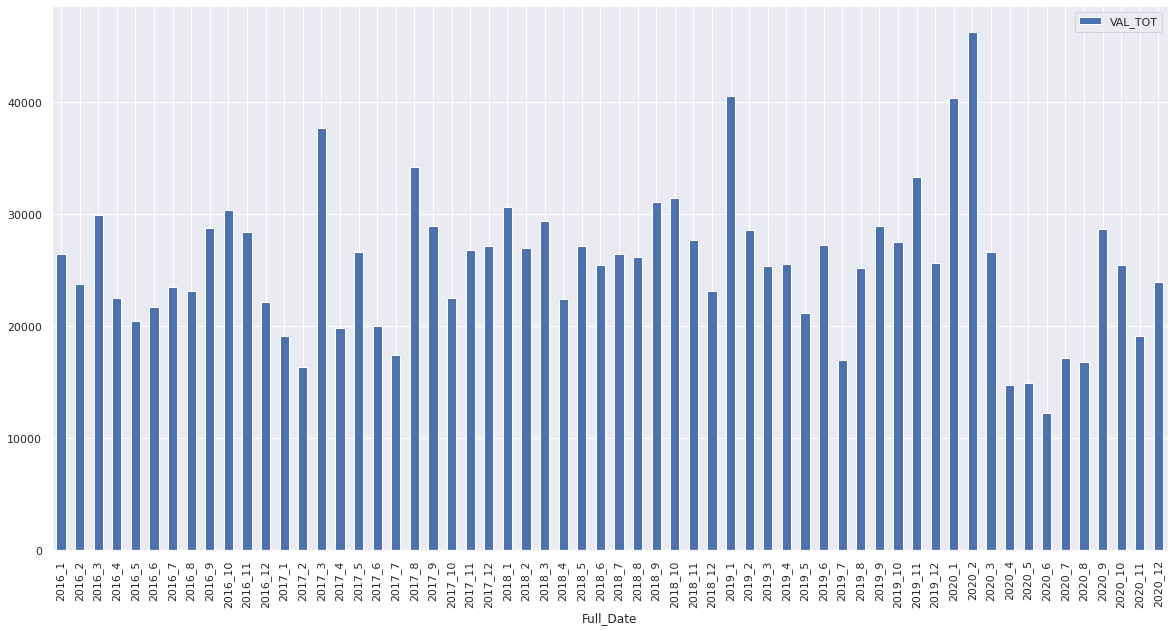

In [82]:
data_group_1_a.plot(x="Full_Date", y="VAL_TOT", kind="bar",figsize=(20,10))
plt.show();

In [83]:
#agrupanfdo por ano e pelo total gasto UTI

data_group_2 = data.groupby(['ANO_CMPT'])['VAL_UTI'].agg('sum')
data_group_2 = pd.DataFrame(data_group_2)
data_group_2

,VAL_UTI
ANO_CMPT,
2016,12787.74
2017,10926.72
2018,8497.27
2019,12027.82
2020,27062.47


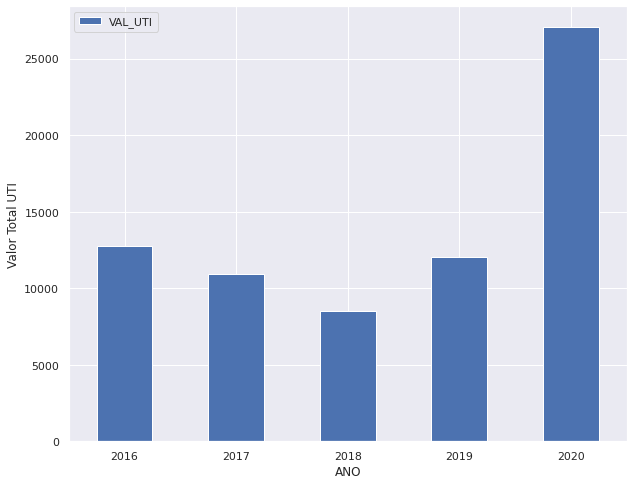

In [84]:
#rot - rotação da legenda, no caso 0 graus
ax = data_group_2.plot.bar(figsize=(10, 8), rot=0);
plt.xlabel('ANO', fontsize=12)
plt.ylabel('Valor Total UTI', fontsize=12);
#Até 2019 tinha uma semelhança noa valores totais gastos com a UTI, me 2020 esse valor mais do que duplicou

In [85]:
#agrupanfdo por ano, mes e pelo total gasto UTI

data_group_3 = data.groupby(['ANO_CMPT', 'MES_CMPT'])['VAL_UTI'].agg('sum')
data_group_3 = pd.DataFrame(data_group_3)
data_group_3

VAL_UTI
ANO_CMPT MES_CMPT          
2016     1             0.00
         2             0.00
         3          3231.35
         4             0.00
         5             0.00
         6             0.00
         7             0.00
         8           574.46
         9          1914.88
         10         2543.15
         11         4523.90
         12            0.00
2017     1           957.44
         2             0.00
         3          2393.60
         4             0.00
         5             0.00
         6             0.00
         7             0.00
         8          7575.68
         9             0.00
         10            0.00
         11            0.00
         12            0.00
2018     1             0.00
         2          1148.92
         3          1436.16
         4             0.00
         5          5433.47
         6             0.00
         7             0.00
         8             0.00
         9           478.72
         10            0.00
         11            0.00
         12            0.00
2019     1          8138.24
         2          2872.32
         3             0.00
         4             0.00
         5             0.00
         6             0.00
         7             0.00
         8             0.00
         9             0.00
         10         1017.26
         11            0.00
         12            0.00
2020     1          6866.50
         2          2004.61
         3             0.00
         4             0.00
         5             0.00
         6             0.00
         7             0.00
         8             0.00
         9         10531.84
         10          478.72
         11          957.44
         12         6223.36

In [86]:
#agrupanfdo por ano, mes e pelo total gasto UTI

data_group_4 = data.groupby(['MES_CMPT', 'ANO_CMPT'])['VAL_UTI'].agg('sum')
data_group_4 = pd.DataFrame(data_group_4)
data_group_4

VAL_UTI
MES_CMPT ANO_CMPT          
1        2016          0.00
         2017        957.44
         2018          0.00
         2019       8138.24
         2020       6866.50
2        2016          0.00
         2017          0.00
         2018       1148.92
         2019       2872.32
         2020       2004.61
3        2016       3231.35
         2017       2393.60
         2018       1436.16
         2019          0.00
         2020          0.00
4        2016          0.00
         2017          0.00
         2018          0.00
         2019          0.00
         2020          0.00
5        2016          0.00
         2017          0.00
         2018       5433.47
         2019          0.00
         2020          0.00
6        2016          0.00
         2017          0.00
         2018          0.00
         2019          0.00
         2020          0.00
7        2016          0.00
         2017          0.00
         2018          0.00
         2019          0.00
         2020          0.00
8        2016        574.46
         2017       7575.68
         2018          0.00
         2019          0.00
         2020          0.00
9        2016       1914.88
         2017          0.00
         2018        478.72
         2019          0.00
         2020      10531.84
10       2016       2543.15
         2017          0.00
         2018          0.00
         2019       1017.26
         2020        478.72
11       2016       4523.90
         2017          0.00
         2018          0.00
         2019          0.00
         2020        957.44
12       2016          0.00
         2017          0.00
         2018          0.00
         2019          0.00
         2020       6223.36

In [87]:
data_group_3_1 = data.groupby(['ANO_CMPT', 'MES_CMPT'])['VAL_UTI'].agg('sum').reset_index()

data_group_3_1.columns

Index(['ANO_CMPT', 'MES_CMPT', 'VAL_UTI'], dtype='object')

In [88]:
data_group_3_1["Full_Date"] = data_group_3_1["ANO_CMPT"].astype(str) + "_" + data_group_3_1["MES_CMPT"].astype(str)
data_group_3_1

,ANO_CMPT,MES_CMPT,VAL_UTI,Full_Date
0,2016,1,0.00,2016_1
1,2016,2,0.00,2016_2
2,2016,3,3231.35,2016_3
3,2016,4,0.00,2016_4
4,2016,5,0.00,2016_5
5,2016,6,0.00,2016_6
6,2016,7,0.00,2016_7
7,2016,8,574.46,2016_8
8,2016,9,1914.88,2016_9
9,2016,10,2543.15,2016_10


In [89]:
data_group_3_1.columns

Index(['ANO_CMPT', 'MES_CMPT', 'VAL_UTI', 'Full_Date'], dtype='object')

In [90]:
data = [go.Scatter(x=data_group_3_1.Full_Date, y=data_group_3_1['VAL_UTI'])]

py.iplot(data)

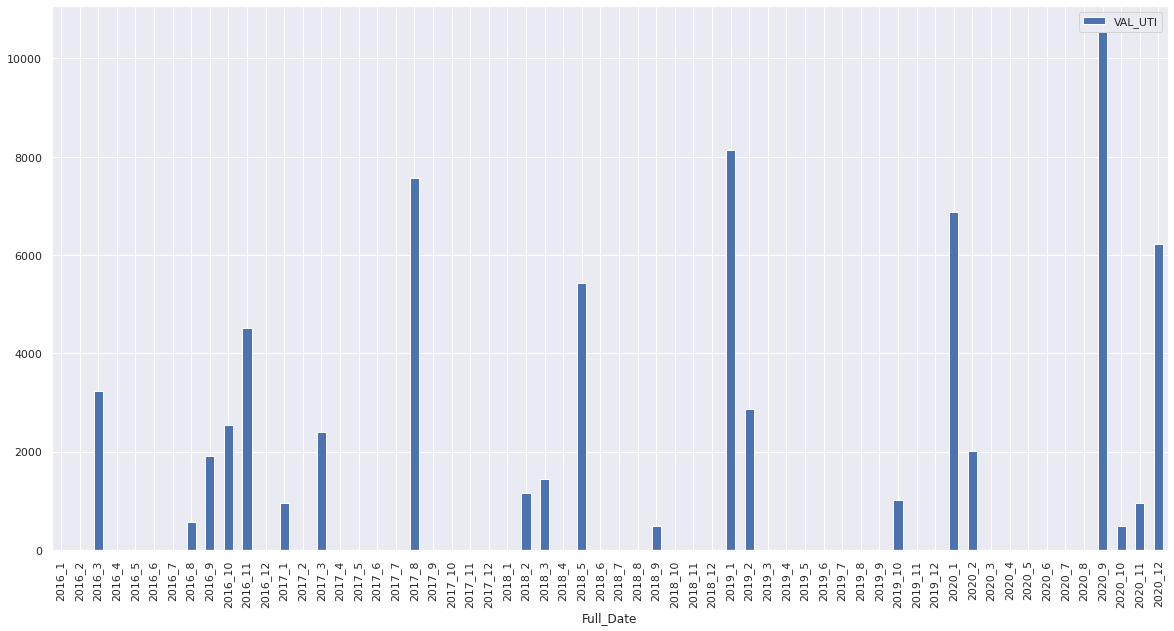

In [91]:
data_group_3_1.plot(x="Full_Date", y="VAL_UTI", kind="bar",figsize=(20,10))
plt.show();

MEDICAMENTOS:

* metotrexato: considerando dose semanal de 25mg 1 por semana // preço máximo: 
R$3682,94 TEVAMETHO (TEVA .) 100 MG/ML SOL INJ IV IM IT CT FA VD TRANS X 50 ML (*) https://www.bad.org.uk/shared/get-file.ashx?id=1495&itemtype=document

* ciclosporina: // preço máximo: R$1042,69 para SANDIMMUN/SANDIMMUN NEORAL (NOVARTIS BIOCIENCIAS S.A) 50 MG/ML SOL DIL INFUS IV CT 10 AMP VD TRANS X 5 ML https://www.saudedireta.com.br/docsupload/1340102276Capitulo10.pdf

* azatioprina: // preço máximo R$ 540,45 para IMUNEN (CRISTÁLIA QUÍMICO) 50 MG COM REV CX BL AL PLAS TRANS X 200 (*)

* micofenolato de mofetila: //preço máximo R$ 8298,70 para MOFECELL (CRISTÁLIA QUÍMICO) 500 MG COM REV CT BL AL PLAS TRANS X 500 (*)